In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Cargar datos y realizar un primer análisis

In [284]:
# Leer los datos del csv
df = pd.read_csv('titanic.csv', header=0, delimiter=',')

In [285]:
# Ver los datos cargados
print("Estructura de los datos:")
df.head()

Estructura de los datos:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [286]:
# Imprime como tabla
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [287]:
# Informacion del dataframe
# Cuantos atributos de cada tipo, cuantos no nulos...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [288]:
# Estadisticas basicas de las columnas numericas
# Media, std, minimo, maximo...
estadisticas_numericas = df.describe()
estadisticas_numericas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [289]:
# Media de una columna con dos decimales
media_columna = df['Age'].mean()
media_columna = round(media_columna, 2)
print("La media de la columna 'Age' es:", media_columna)

La media de la columna 'Age' es: 29.7


In [290]:
# Desviacion estandar de una columna e imprimir con formato
std_columna = df['Age'].std()
print("La desviacion estandar de la columna 'Age' es: {:.2f}".format(std_columna))

La desviacion estandar de la columna 'Age' es: 14.53


In [291]:
# Numero de filas y columnas
print("\nNumero de filas y columnas:")
print(df.shape)


Numero de filas y columnas:
(891, 12)


In [292]:
# Acceder a las filas
print("\nFilas solo:")
print(df.shape[0])

# Acceder a las columnas
print("\nColumnas solo:")
print(df.shape[1])


Filas solo:
891

Columnas solo:
12


In [293]:
# Numero de filas solo
print("Numero de filas: "+str(len(df)))

Numero de filas: 891


In [294]:
# Nombre de las columnas
print("Nombres de las columnas:")
print(df.columns)

Nombres de las columnas:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [295]:
# Tipo de cada atributo
print("\nTipo de cada atributo:")
print(df.dtypes)


Tipo de cada atributo:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [296]:
# Tipo de la variable df
print("Tipo de la variable df:")
print(type(df))

Tipo de la variable df:
<class 'pandas.core.frame.DataFrame'>


In [297]:
# Convertir columna de int a str
df['Pclass'] = df['Pclass'].astype(str)

# Mostrar el tipo de la columna imprimiendo todo en una frase
print(f"\nTipo de la columna 'Pclass' {df['Pclass'].dtype} después de la conversión.")

# Convertir columna de str a int
df['Pclass'] = df['Pclass'].astype(int)

# Mostrar el tipo de la columna imprimiendo todo en una frase
print(f"\nTipo de la columna 'Pclass' {df['Pclass'].dtype} al finalizar de la conversión.")


Tipo de la columna 'Pclass' object después de la conversión.

Tipo de la columna 'Pclass' int32 al finalizar de la conversión.


## Tratamiento de los valores nulos

In [298]:
# Numero de filas con valores faltantes
# evaluar si hay algun nulo a lo largo de las filas
# Si la fila tiene nulo devuelve true
print("\nNumero de filas con valores faltantes:")
print(df.isnull().any(axis=1).sum())



Numero de filas con valores faltantes:
708


In [299]:
# Numero de valores faltantes por columna
print("\nNumero de valores faltantes por columna:")
print(df.isnull().sum())


Numero de valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

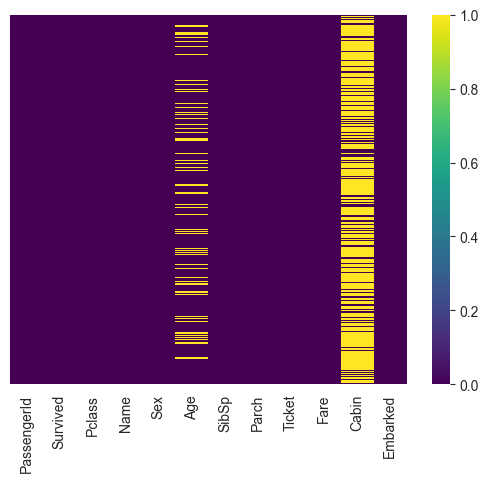

In [300]:
# Analizar los nulos
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
# solo age, embarked y cabin tienen nulos

In [301]:
# Eliminar la columna Cabin
df.drop('Cabin', axis=1, inplace=True)

In [302]:
# ver resultado
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [303]:
# Reemplazar valores faltantes de Age por la media
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [304]:
# ver numero de nulos en columna
num_nulos = df['Age'].isnull().sum()
print("Número de valores nulos en la columna Age:", num_nulos)

Número de valores nulos en la columna Age: 0


In [305]:
# Eliminar las filas que tengan nulo en la columna Embarked
df.dropna(subset=['Embarked'], inplace=True)

In [306]:
# Volvemos a ver el numero de filas con valores faltantes
# evaluar si hay algun nulo a lo largo de las filas
# Si la fila tiene nulo devuelve true
print("\nNumero de filas con valores faltantes:")
print(df.isnull().any(axis=1).sum())


Numero de filas con valores faltantes:
0


## Análisis de los datos

In [307]:
# Seleccionar columnas por el tipo
columnas_categoricas = df.select_dtypes(include=['object']).columns
columnas_categoricas


Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [308]:
# Redefinimos las columnas categoricas
columnas_categoricas=['Sex', 'Embarked','Pclass']

Valores unicos de la columna Sex:
['male', 'female']

Valores diferentes en la columna 'Sex' y su proporcion:
Sex
male      0.649044
female    0.350956
Name: proportion, dtype: float64



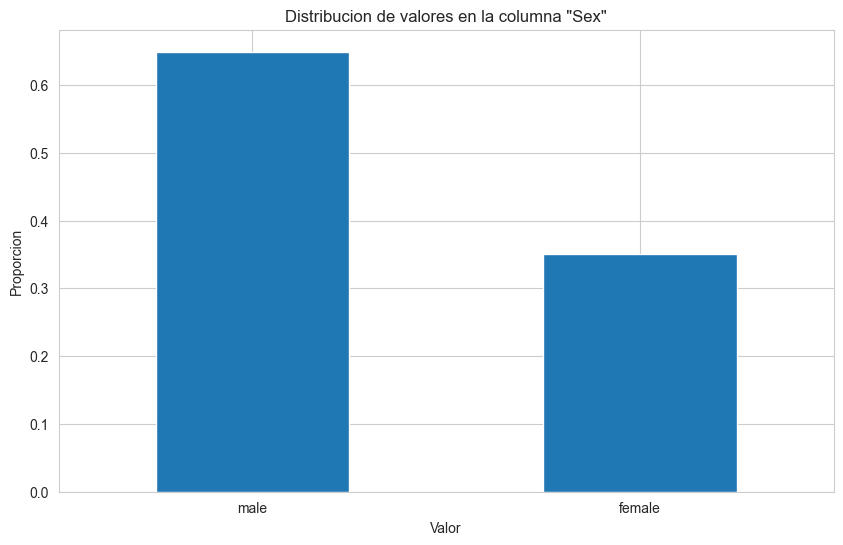

Valores unicos de la columna Embarked:
['S', 'C', 'Q']

Valores diferentes en la columna 'Embarked' y su proporcion:
Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64



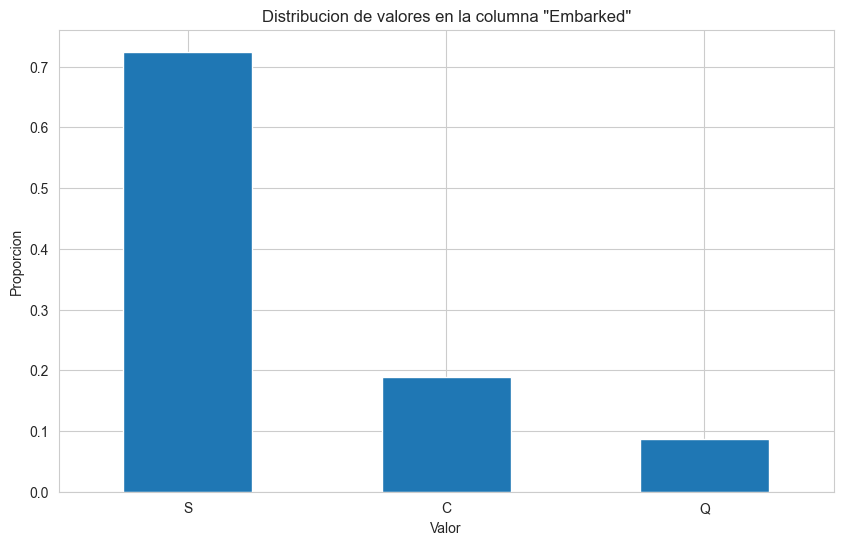

Valores unicos de la columna Pclass:
[3, 1, 2]

Valores diferentes en la columna 'Pclass' y su proporcion:
Pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64



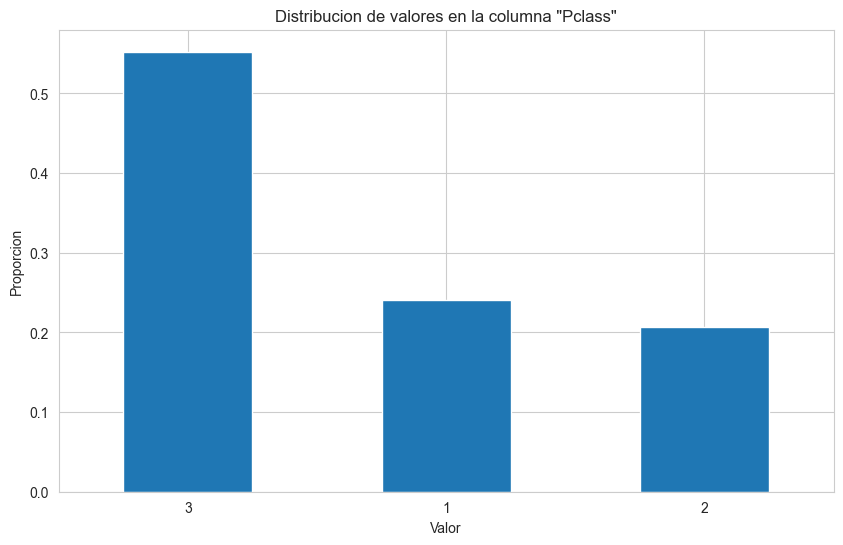

In [309]:
# Iterar sobre estas
for columna in columnas_categoricas:

    # Valores unicos de la columna en forma de lista
    valores_unicos_lista = df[columna].unique().tolist()
    print(f"Valores unicos de la columna {columna}:")
    print(valores_unicos_lista)

    # Obtener los valores unicos y sus frecuencias en proporciones. Si se quita normalize muestra la cuenta
    valores_unicos = df[columna].value_counts(normalize=True)
    
    # Imprimir los valores diferentes y su proporcion
    print(f"\nValores diferentes en la columna '{columna}' y su proporcion:")
    print(valores_unicos)
    print() 

    # Crear un gráfico de barras
    plt.figure(figsize=(10, 6))
    valores_unicos.plot(kind='bar')
    
    # Configurar etiquetas y título
    plt.title(f'Distribucion de valores en la columna "{columna}"')
    plt.xlabel('Valor')
    plt.ylabel('Proporcion')
    plt.xticks(rotation=0)
    
    # Mostrar el gráfico
    plt.show() 


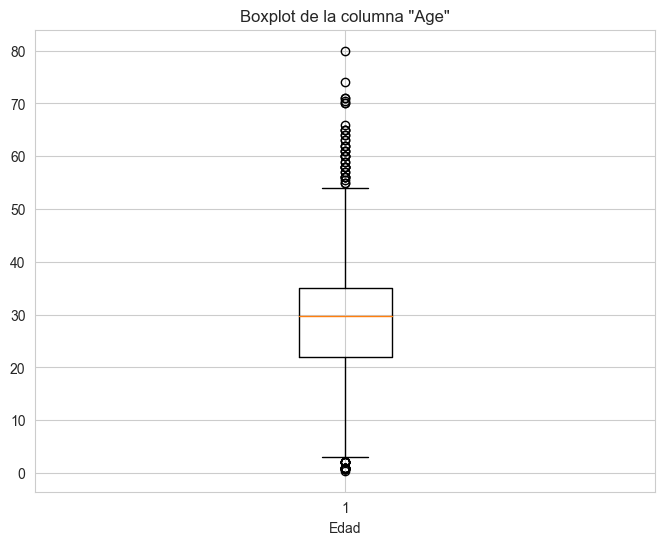

In [310]:
# Crear un boxplot sobre los datos de la columna Age
plt.figure(figsize=(8, 6))
# Se eliminan los valores nulos
plt.boxplot(df['Age'].dropna(), vert=True)  
plt.title('Boxplot de la columna "Age"')
plt.xlabel('Edad')
plt.show()

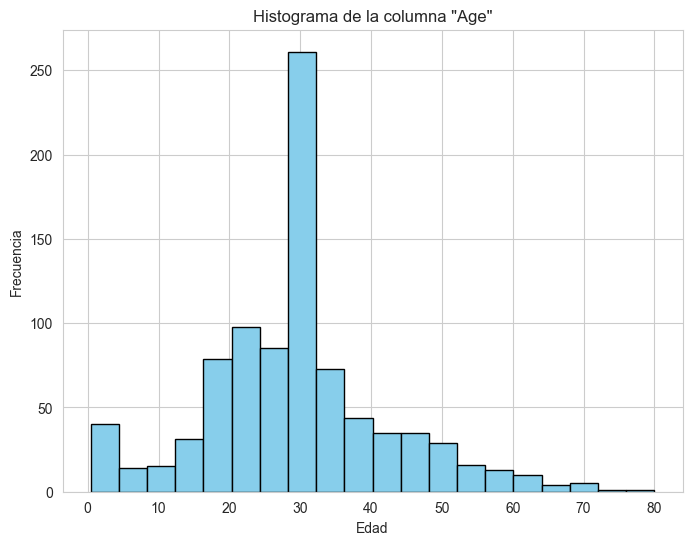

In [311]:
# Crear un histograma de la columna Age
plt.figure(figsize=(8, 6))
# Se eliminan los valores nulos
# Bins numero de separaciones
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')  
plt.title('Histograma de la columna "Age"')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# Lineas del fondo
plt.grid(True)
plt.show()

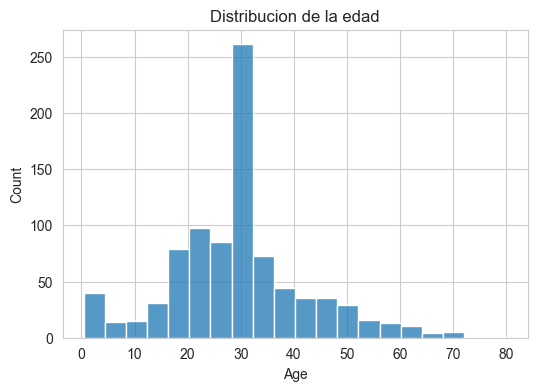

In [312]:
# Histograma similar con seaborn
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'].dropna(), bins=20, kde=False)
plt.title('Distribucion de la edad')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

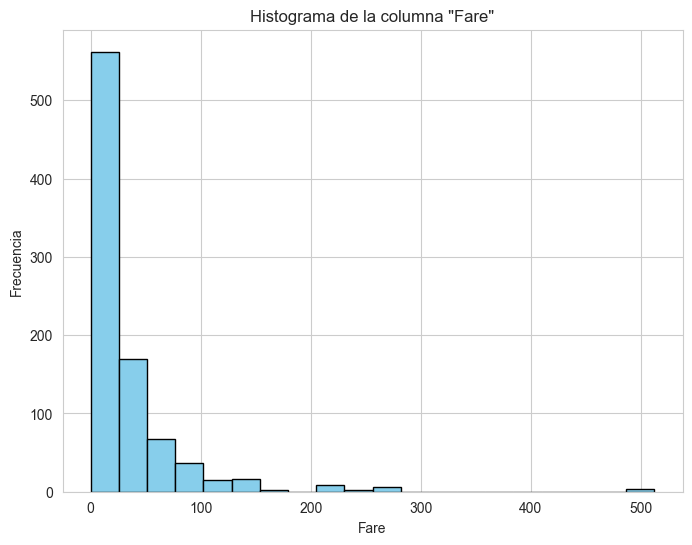

In [313]:
# Crear un histograma de la columna fare
plt.figure(figsize=(8, 6))
plt.hist(df['Fare'], bins=20, color='skyblue', edgecolor='black')  
plt.title('Histograma de la columna "Fare"')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

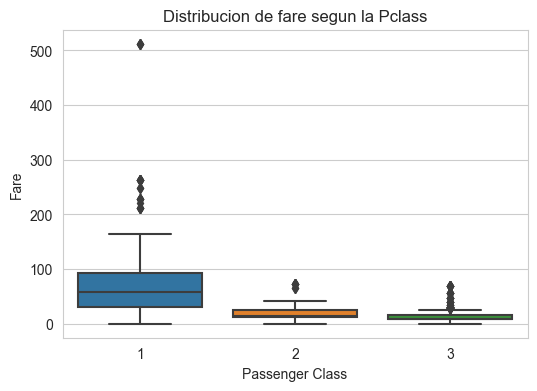

In [314]:
# Boxplot fare y clase
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Distribucion de fare segun la Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()
# Los que mas pagaron, iban en la clase 1

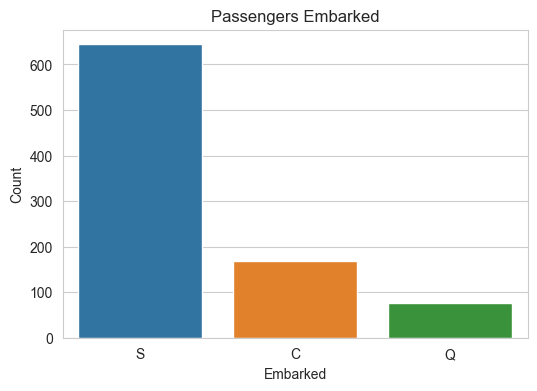

In [315]:
# Pasajeros embarcados por puerto
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df)
plt.title('Passengers Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()
# Mas gente embarco en S

C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_17976\2950326086.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_17976\2950326086.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)


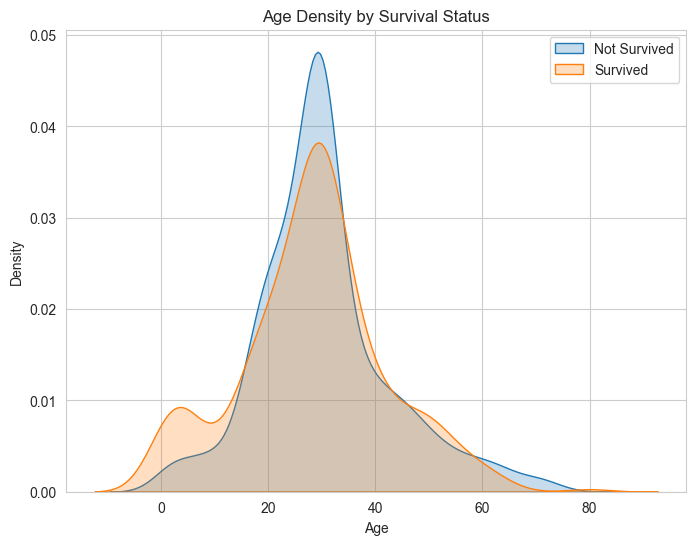

In [316]:
# Grafica de densidad con supervivencia por edad
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.title('Age Density by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
# Los mas jovenes sobrevivieron mas

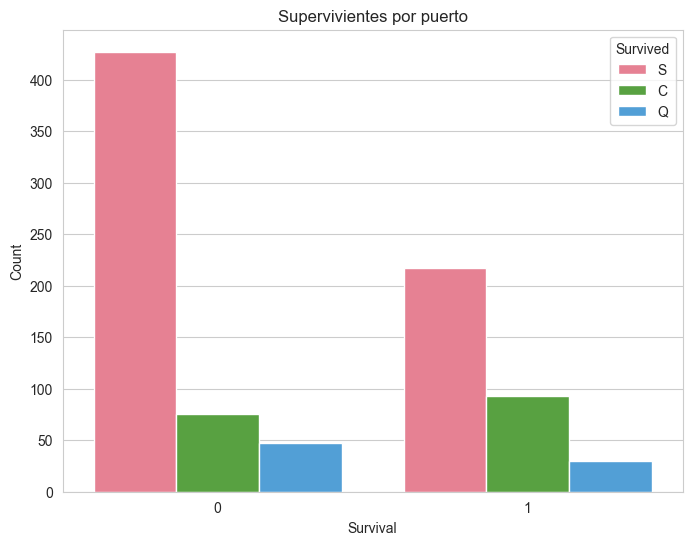

In [317]:
# Supervivientes por puerto
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Embarked', data=df, palette='husl')
plt.title('Supervivientes por puerto')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()
# Los que embarcaron en S sobrevivieron menos

<Axes: xlabel='Pclass', ylabel='Age'>

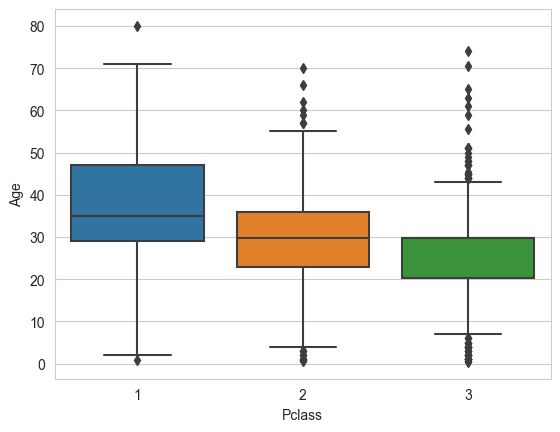

In [318]:
# Boxplot por edad y clase
sns.boxplot(x="Pclass",y="Age",data=df)
# Los mas mayores iban en clase 1 y los jovenes en clase 3

<Axes: xlabel='Embarked', ylabel='Fare'>

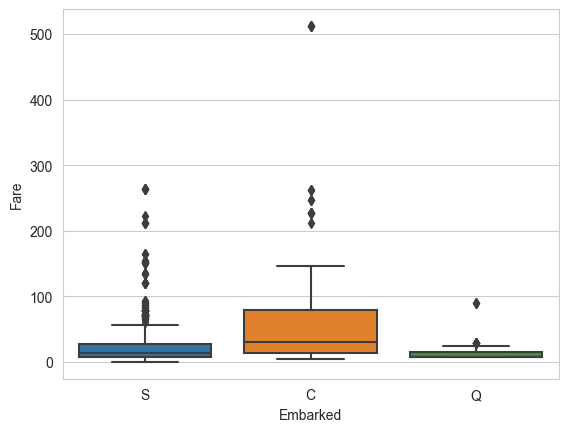

In [319]:
# Boxplot por fare y embarked
sns.boxplot(x="Embarked",y="Fare",data=df)
# En el puerto C la tarifa era mas elevada

<Axes: xlabel='Survived', ylabel='Age'>

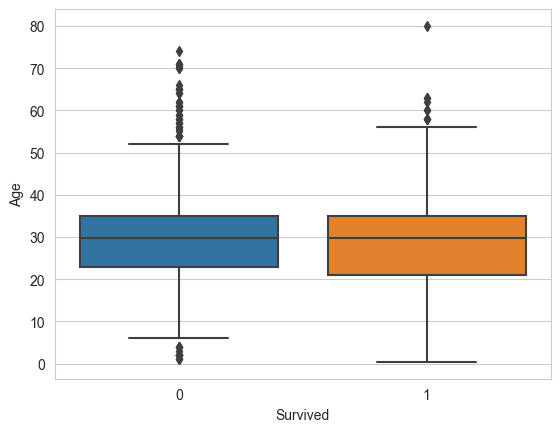

In [320]:
# Boxplot si sobrevivieron o no por edad
sns.boxplot(x="Survived",y="Age",data=df)
# Los que sobrevivieron eran un poco mas jovenes

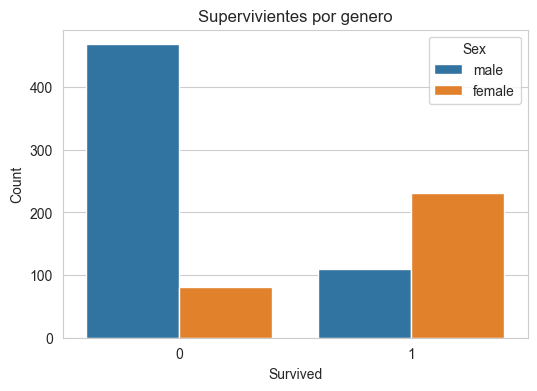

In [321]:
# Supervivientes por genero
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Supervivientes por genero')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
# Los hombres sobrevivieron menos y murieron mas en comparacion con las mujeres

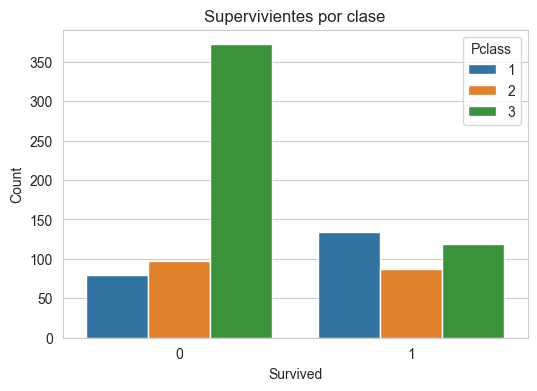

In [322]:
# Supervivientes por clase
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Supervivientes por clase')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
# Los de la clase 3, murieron mas

In [323]:
# Numero de pasajeros
total=len(df)
print("Total pasajeros: "+str(total))

Total pasajeros: 889


In [324]:
# Porcentaje hombres y mujeres
condicion= df['Sex'] == 'male'
filas = round((condicion.sum()/total)*100,2)
print("Hombres: "+str(filas)+"% del total de pasajeros")

condicion = df['Sex'] == 'female'
filas = round((condicion.sum()/total)*100,2)
print("Mujeres: "+str(filas)+"% del total de pasajeros")

Hombres: 64.9% del total de pasajeros
Mujeres: 35.1% del total de pasajeros


In [325]:
# Porcentajes sobrevivieron y no
condicion = df['Survived'] == 0
filas = round((condicion.sum()/total)*100,2)
print("No sobrevivieron: "+str(filas)+"% del total de pasajeros")

condicion = df['Survived'] == 1
filas = round((condicion.sum()/total)*100,2)
print("Sobrevivieron: "+str(filas)+"% del total de pasajeros")

No sobrevivieron: 61.75% del total de pasajeros
Sobrevivieron: 38.25% del total de pasajeros


In [326]:
#Porcentaje por clase
condicion = df['Pclass'] == 1
filas = round((condicion.sum()/total)*100,2)
print("En clase 1: "+str(filas)+"% del total de pasajeros")

condicion = df['Pclass'] == 2
filas = round((condicion.sum()/total)*100,2)
print("En clase 2: "+str(filas)+"% del total de pasajeros")

condicion = df['Pclass'] == 3
filas = round((condicion.sum()/total)*100,2)
print("En clase 3: "+str(filas)+"% del total de pasajeros")

En clase 1: 24.07% del total de pasajeros
En clase 2: 20.7% del total de pasajeros
En clase 3: 55.23% del total de pasajeros


In [327]:
# Porcentaje por puerto
condicion = df['Embarked'] == 'S'
filas = round((condicion.sum()/total)*100,2)
print("Embarcados en S: "+str(filas)+"% del total de pasajeros")

condicion = df['Embarked'] == 'C'
filas = round((condicion.sum()/total)*100,2)
print("Embarcados en C: "+str(filas)+"% del total de pasajeros")

condicion = df['Embarked'] == 'Q'
filas = round((condicion.sum()/total)*100,2)
print("Embarcados en Q: "+str(filas)+"% del total de pasajeros")

Embarcados en S: 72.44% del total de pasajeros
Embarcados en C: 18.9% del total de pasajeros
Embarcados en Q: 8.66% del total de pasajeros


In [328]:
#Porcentaje por clase y si sobrevivieron
condicion = df['Pclass'] == 1
total = condicion.sum()
condicion1 = df['Pclass'] == 1
condicion2=df['Survived'] == 1
condicion=condicion1& condicion2
filas = round((condicion.sum()/total)*100,2)
print("En clase 1 y sobrevivieron: "+str(filas)+"% del total de pasajeros")


condicion = df['Pclass'] == 2
total = condicion.sum()
condicion1 = df['Pclass'] == 2
condicion2=df['Survived'] == 1
condicion=condicion1& condicion2
filas = round((condicion.sum()/total)*100,2)
print("En clase 2 y sobrevivieron: "+str(filas)+"% del total de pasajeros")


condicion = df['Pclass'] == 3
total = condicion.sum()
condicion1 = df['Pclass'] == 3
condicion2=df['Survived'] == 1
condicion=condicion1& condicion2
filas = round((condicion.sum()/total)*100,2)
print("En clase 3 y sobrevivieron: "+str(filas)+"% del total de pasajeros")

En clase 1 y sobrevivieron: 62.62% del total de pasajeros
En clase 2 y sobrevivieron: 47.28% del total de pasajeros
En clase 3 y sobrevivieron: 24.24% del total de pasajeros


In [329]:
#Porcentaje por genero y si sobrevivieron
condicion = df['Sex'] == 'male'
total = condicion.sum()
condicion1 = df['Sex'] == 'male'
condicion2=df['Survived'] == 1
condicion=condicion1& condicion2
filas = round((condicion.sum()/total)*100,2)
print("Hombres y sobrevivieron: "+str(filas)+"% del total de pasajeros")

condicion = df['Sex'] == 'female'
total = condicion.sum()
condicion1 = df['Sex'] == 'female'
condicion2=df['Survived'] == 1
condicion=condicion1& condicion2
filas = round((condicion.sum()/total)*100,2)
print("Mujeres y sobrevivieron: "+str(filas)+"% del total de pasajeros")

Hombres y sobrevivieron: 18.89% del total de pasajeros
Mujeres y sobrevivieron: 74.04% del total de pasajeros


In [330]:
#Porcentaje pasajeros sobrevivieron y murieron por clase
# Total de pasajeros por clase
total_por_clase = df['Pclass'].value_counts()

# Total de pasajeros que sobrevivieron por clase
sobrevivieron_por_clase = df[df['Survived'] == 1]['Pclass'].value_counts()

# Total de pasajeros que murieron por clase
murieron_por_clase = df[df['Survived'] == 0]['Pclass'].value_counts()

# Porcentaje de pasajeros que sobrevivieron por clase
porcentaje_sobrevivieron_por_clase = (sobrevivieron_por_clase / total_por_clase) * 100

# Porcentaje de pasajeros que murieron por clase
porcentaje_murieron_por_clase = (murieron_por_clase / total_por_clase) * 100

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Total Pasajeros': total_por_clase,
    'Sobrevivieron': sobrevivieron_por_clase,
    '% Sobrevivieron': porcentaje_sobrevivieron_por_clase,
    'Murieron': murieron_por_clase,
    '% Murieron': porcentaje_murieron_por_clase
})

# Mostrar el DataFrame
print(resultados)


        Total Pasajeros  Sobrevivieron  % Sobrevivieron  Murieron  % Murieron
Pclass                                                                       
1                   214            134        62.616822        80   37.383178
2                   184             87        47.282609        97   52.717391
3                   491            119        24.236253       372   75.763747


In [331]:
# Tarifa media por puerto
tarifa_media_por_puerto = df.groupby('Embarked')['Fare'].mean()
tarifa_media_por_puerto

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [332]:
# Suma de las tarifas por clase
suma_tarifas_por_clase = df.groupby('Pclass')['Fare'].sum()
suma_tarifas_por_clase

Pclass
1    18017.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

In [333]:
# Calcular la tarifa maxima por combinacion de puerto y clase
tarifa_maxima_por_combinacion = df.groupby(['Embarked', 'Pclass'])['Fare'].max()
tarifa_maxima_por_combinacion

Embarked  Pclass
C         1         512.3292
          2          41.5792
          3          22.3583
Q         1          90.0000
          2          12.3500
          3          29.1250
S         1         263.0000
          2          73.5000
          3          69.5500
Name: Fare, dtype: float64

In [334]:
# Edad media supervivientes del puerto "S" en la clase 1
# Filtrar los supervivientes en el puerto "S" que iban en la clase 1
filtro = (df['Survived'] == 1) & (df['Embarked'] == 'S') & (df['Pclass'] == 1)
pasajeros_filtrados = df[filtro]

# Calcular la edad media de los pasajeros filtrados
edad_media_supervivientes_puerto_s_clase_1 = pasajeros_filtrados['Age'].mean()

# Mostrar la edad media de los supervivientes en el puerto "S" que iban en la clase 1
print("Edad media de los supervivientes en el puerto 'S' que iban en la clase 1:", edad_media_supervivientes_puerto_s_clase_1)


Edad media de los supervivientes en el puerto 'S' que iban en la clase 1: 34.00693163751987


In [335]:
# Numero de pasajeros que no iban en la clase 1 y embarcaron en "S" o "C" y su edad era entre 15 y 35
# Filtrar pasajeros que no iban en la clase 1
# y que embarcaron en los puertos "S" o "C" y cuyas edades estaban entre 15 y 35 años
filtro = ((df['Pclass'] != 1) & (df['Embarked'].isin(['S', 'C'])) & (df['Age'] >= 15) & (df['Age'] <= 35))
pasajeros_filtrados = df[filtro]

# Calcular el número de pasajeros que cumplen con las condiciones
numero_pasajeros = pasajeros_filtrados.shape[0]

# Mostrar el número de pasajeros que cumplen con las condiciones
print("Número de pasajeros que no iban en la clase 1, embarcaron en los puertos 'S' o 'C' y cuyas edades estaban entre 15 y 35 años:", numero_pasajeros)


Número de pasajeros que no iban en la clase 1, embarcaron en los puertos 'S' o 'C' y cuyas edades estaban entre 15 y 35 años: 424


In [336]:
#Porcentaje de pasajeros que iban en cada clase en cada puerto
# Filtrar los pasajeros en cada clase en cada puerto
conteo_por_clase_puerto = df.groupby(['Embarked', 'Pclass']).size()

# Calcular el total de pasajeros en cada puerto
total_por_puerto = df['Embarked'].value_counts()

# Calcular el porcentaje de pasajeros en cada clase en cada puerto respecto al total de pasajeros en ese puerto
porcentaje_por_clase_puerto = (conteo_por_clase_puerto / total_por_puerto) * 100

# Mostrar el porcentaje de pasajeros que iban en cada clase en cada puerto sobre el total de pasajeros en cada puerto
print("Porcentaje de pasajeros que iban en cada clase en cada puerto:")
print(porcentaje_por_clase_puerto)


Porcentaje de pasajeros que iban en cada clase en cada puerto:
Embarked  Pclass
C         1         50.595238
          2         10.119048
          3         39.285714
Q         1          2.597403
          2          3.896104
          3         93.506494
S         1         19.720497
          2         25.465839
          3         54.813665
dtype: float64


In [337]:
# Crear la columna de intervalo de edad
df['Edad_Rango'] = df['Age'].apply(lambda x: f"{math.floor(x/5)*5}-{math.floor(x/5)*5 + 5}")


In [338]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Edad_Rango
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,20-25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,35-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,25-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,35-40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,35-40
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,25-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,15-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,25-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,25-30


In [339]:
# Agrupar los pasajeros por intervalo de edad
conteo_por_intervalo_edad = df['Edad_Rango'].value_counts()

# Calcular el total de pasajeros
total_pasajeros = len(df)

In [340]:
# Calcular el porcentaje de pasajeros en cada intervalo de edad respecto al total de pasajeros
porcentaje_por_intervalo_edad = (conteo_por_intervalo_edad / total_pasajeros) * 100

# Mostrar cuantos pasajeros hay en cada intervalo de edad y su porcentaje sobre el total de pasajeros
print("Numero de pasajeros en cada intervalo de edad y su porcentaje sobre el total de pasajeros:")
print(pd.concat([conteo_por_intervalo_edad, porcentaje_por_intervalo_edad], axis=1, keys=['Cantidad', 'Porcentaje']))


Numero de pasajeros en cada intervalo de edad y su porcentaje sobre el total de pasajeros:
            Cantidad  Porcentaje
Edad_Rango                      
25-30            283   31.833521
20-25            114   12.823397
30-35             95   10.686164
15-20             86    9.673791
35-40             71    7.986502
40-45             48    5.399325
45-50             41    4.611924
0-5               40    4.499438
50-55             32    3.599550
5-10              22    2.474691
10-15             16    1.799775
55-60             16    1.799775
60-65             14    1.574803
70-75              6    0.674916
65-70              4    0.449944
80-85              1    0.112486


In [341]:
# Agrupar los pasajeros por intervalo de edad y género
grupo_por_intervalo_edad_genero = df.groupby(['Edad_Rango', 'Sex'])
conteo_por_grupo = grupo_por_intervalo_edad_genero.size().reset_index(name='Count')
print(conteo_por_grupo)

   Edad_Rango     Sex  Count
0         0-5  female     17
1         0-5    male     23
2       10-15  female      9
3       10-15    male      7
4       15-20  female     36
5       15-20    male     50
6       20-25  female     42
7       20-25    male     72
8       25-30  female     83
9       25-30    male    200
10      30-35  female     33
11      30-35    male     62
12      35-40  female     26
13      35-40    male     45
14      40-45  female     18
15      40-45    male     30
16      45-50  female     14
17      45-50    male     27
18       5-10  female     13
19       5-10    male      9
20      50-55  female     12
21      50-55    male     20
22      55-60  female      6
23      55-60    male     10
24      60-65  female      3
25      60-65    male     11
26      65-70    male      4
27      70-75    male      6
28      80-85    male      1


In [342]:
# Contar el número de pasajeros que sobrevivieron o no en cada intervalo de edad y género
conteo_sobrevivientes_por_intervalo_edad_genero = grupo_por_intervalo_edad_genero['Survived'].sum()
conteo_no_sobrevivientes_por_intervalo_edad_genero = grupo_por_intervalo_edad_genero['Survived'].count() - conteo_sobrevivientes_por_intervalo_edad_genero


In [343]:
# Calcular el porcentaje de pasajeros que sobrevivieron o no en cada intervalo de edad y género respecto al total de pasajeros en ese intervalo y género
porcentaje_sobrevivientes_por_intervalo_edad_genero = (conteo_sobrevivientes_por_intervalo_edad_genero / conteo_por_intervalo_edad) * 100
porcentaje_no_sobrevivientes_por_intervalo_edad_genero = 100 - porcentaje_sobrevivientes_por_intervalo_edad_genero

# Mostrar el porcentaje de pasajeros que sobrevivieron o no en cada intervalo de edad y género
print("\nPorcentaje de pasajeros que sobrevivieron o no en cada intervalo de edad y género:")
print(pd.concat([porcentaje_sobrevivientes_por_intervalo_edad_genero, porcentaje_no_sobrevivientes_por_intervalo_edad_genero], axis=1, keys=['Sobrevivientes (%)', 'No sobrevivientes (%)']))



Porcentaje de pasajeros que sobrevivieron o no en cada intervalo de edad y género:
                   Sobrevivientes (%)  No sobrevivientes (%)
Edad_Rango Sex                                              
0-5        female           30.000000              70.000000
           male             37.500000              62.500000
10-15      female           31.250000              68.750000
           male             12.500000              87.500000
15-20      female           33.720930              66.279070
           male              5.813953              94.186047
20-25      female           28.070175              71.929825
           male              6.140351              93.859649
25-30      female           19.787986              80.212014
           male             12.014134              87.985866
30-35      female           28.421053              71.578947
           male             13.684211              86.315789
35-40      female           30.985915              69.014085
 

In [344]:
# groupby en tres variables (Edad, Sexo y Clase)
resultado = df.groupby(['Edad_Rango', 'Sex', 'Pclass']).size().reset_index(name='Count')

# Mostrar los resultados
print(resultado)

   Edad_Rango     Sex  Pclass  Count
0         0-5  female       1      1
1         0-5  female       2      4
2         0-5  female       3     12
3         0-5    male       1      2
4         0-5    male       2      8
..        ...     ...     ...    ...
74      65-70    male       3      1
75      70-75    male       1      3
76      70-75    male       2      1
77      70-75    male       3      2
78      80-85    male       1      1

[79 rows x 4 columns]


## Tratamiento outliers

In [345]:
# Detectar valores atípicos en la columna Age
# Calculamos cuartiles
print("\nValores atipicos en 'Age':")
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
# Calcular el rango intercuartílico 
IQR = Q3 - Q1
# Encontramos filas con valores que estan fuera de esos limites. Primer cuartil-1.5 por el rango
outliers_age = (df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))
# Vemos las filas
print(df[outliers_age])


Valores atipicos en 'Age':
     PassengerId  Survived  Pclass   
7              8         0       3  \
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
824          825         0       3   
827          828         1       2   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name     Sex    Age  SibSp   
7                   Palsson, Master. Gosta Leonard    male   2.00      3  \
11                        Bonnell, Miss. Elizabeth  female  58.00      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0   
16                            Rice, Master. Eugene    male   2.00      4   
33                           Wheadon, Mr. Edward H    male  66.00      0   
..                                             ...     ... 

In [346]:
# Ver fila por indice
fila_posicion = df.iloc[33]
fila_posicion

PassengerId                       34
Survived                           0
Pclass                             2
Name           Wheadon, Mr. Edward H
Sex                             male
Age                             66.0
SibSp                              0
Parch                              0
Ticket                    C.A. 24579
Fare                            10.5
Embarked                           S
Edad_Rango                     65-70
Name: 33, dtype: object

In [347]:
# Ver celda por indices
dato_celda_posicion = df.iloc[33, 5]
dato_celda_posicion

66.0

In [348]:
# Otra forma
dato_celda_etiqueta = df.loc[33, "Age"]
dato_celda_etiqueta

66.0

In [349]:
#Esto devuelve si la fila cumple la condicion o no
outliers_age

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 889, dtype: bool

In [350]:
# Reemplazar outliers age por el limite correspondiente
df.loc[outliers_age, 'Age'] = df['Age'].clip(lower=Q1, upper=Q3)

In [351]:
# Limite superior
print(Q3)

35.0


In [352]:
# Volver a ver el dato de la celda
dato_celda_etiqueta = df.loc[33, "Age"]
dato_celda_etiqueta

35.0

## Preparación de los datos para los modelos

In [355]:
# Convertir 'Sex' y 'Embarked' a valores numéricos
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [356]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Edad_Rango
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,20-25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,35-40
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,25-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0,35-40
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,35-40
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,25-30
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0,15-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,25-30
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1,25-30


In [357]:
# Estandarizar 'Age' y 'Fare'
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [358]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Edad_Rango
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.700068,1,0,A/5 21171,-0.500240,0,20-25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.907906,1,0,PC 17599,0.788947,1,35-40
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.298075,0,0,STON/O2. 3101282,-0.486650,0,25-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.606411,1,0,113803,0.422861,0,35-40
4,5,0,3,"Allen, Mr. William Henry",0,0.606411,0,0,373450,-0.484133,0,35-40
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,-0.197576,0,0,211536,-0.384475,0,25-30
887,888,1,1,"Graham, Miss. Margaret Edith",1,-1.001563,0,0,112053,-0.042213,0,15-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.073681,1,2,W./C. 6607,-0.174084,0,25-30
889,890,1,1,"Behr, Mr. Karl Howell",0,-0.298075,0,0,111369,-0.042213,1,25-30


In [359]:
# Seleccionar columnas especificas
data = df[['Sex', 'Embarked', 'Age', 'Fare', 'Pclass', 'SibSp', 'Fare']]

In [364]:
data

,Sex,Embarked,Age,Fare,Pclass,SibSp,Fare
0,0,0,-0.700068,-0.500240,3,1,-0.500240
1,1,1,0.907906,0.788947,1,1,0.788947
2,1,0,-0.298075,-0.486650,3,0,-0.486650
3,1,0,0.606411,0.422861,1,1,0.422861
4,0,0,0.606411,-0.484133,3,0,-0.484133
...,...,...,...,...,...,...,...
886,0,0,-0.197576,-0.384475,2,0,-0.384475
887,1,0,-1.001563,-0.042213,1,0,-0.042213
888,1,0,0.073681,-0.174084,3,1,-0.174084
889,0,1,-0.298075,-0.042213,1,0,-0.042213


## Regresión logística

In [360]:
# Separar los datos en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(data, df['Survived'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [363]:
print(X_train_val.shape)
print(X_test.shape)
print(y_train_val.shape)
print(y_test.shape)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(711, 7)
(178, 7)
(711,)
(178,)
(533, 7)
(178, 7)
(533,)
(178,)


In [365]:
# Crear modelo de regresión logística
model = LogisticRegression()

In [374]:
# Definir los parámetros a optimizar y sus posibles valores
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

In [375]:
# Realizar la búsqueda de los parametros con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reac

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [376]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [377]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [378]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8146067415730337


In [379]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)


Exactitud en el conjunto de prueba: 0.8202247191011236


## Random forest

In [382]:
# Crear modelo de random forest
model = RandomForestClassifier( random_state=42)

In [386]:
# Definir los parámetros a optimizar y sus posibles valores
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    #'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    #'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en cada nodo hoja
}

In [387]:
# Realizar la búsqueda de los parametros con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [388]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'min_samples_leaf': 4, 'n_estimators': 100}


In [389]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [390]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8202247191011236


In [391]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.8089887640449438
